# What are Autoencoders?
An autoencoder is, by definition, a technique to encode something automatically. By using a neural network, the autoencoder is able to learn how to decompose data (in our case credit card fraud detection data) into fairly small bits of data, and then using that representation, reconstruct the original data as closely as it can to the original.

Two main components:

Encoder: Learns how to compress the original input into a small encoding

Decoder: Learns how to restore the original data from that encoding generated by the Encode

Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the extremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

In [4]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv(r"/content/drive/MyDrive/creditcard.csv")
data=data.iloc[1:50000,]
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


scale the dataset and saperate it into fraud and non fraud cases

In [6]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]



In [7]:
## input layer 
input_layer = Input(shape=(x.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(x.shape[1], activation='relu')(decoded)


In [8]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

scale the dataset and saperate it into fraud and non fraud cases

# Train the model
now we are going to train our model on 2000 non fraud data observations.we do not need too many samples of data for learning the good representations. We will use only 2000 rows of non fraud cases to train the autoencoder. Additionally, We do not need to run this model for a large number of epochs.

In [9]:
history=autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split =0.20);

Epoch 1/10
7/7 [==============================] - 1s 41ms/step - loss: 0.2325 - val_loss: 0.2317
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2321 - val_loss: 0.2313
Epoch 3/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2317 - val_loss: 0.2309
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2313 - val_loss: 0.2305
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2309 - val_loss: 0.2300
Epoch 6/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2304 - val_loss: 0.2296
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2300 - val_loss: 0.2292
Epoch 8/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2296 - val_loss: 0.2288
Epoch 9/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2292 - val_loss: 0.2284
Epoch 10/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2287 - val_loss: 0.2279


## Visualization of model loss

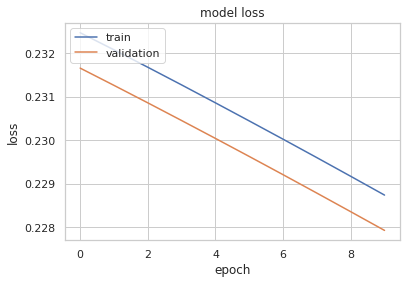

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Obtain the Latent Representations
Now, the model is trained. We are intereseted in obtaining latent representation of the input learned by the model. This can be accessed by the weights of the trained model. We will create another network containing sequential layers, and we will only add the trained weights till the third layer where latent representation exists.

In [11]:
hid_rep = Sequential()
hid_rep .add(autoencoder.layers[0])
hid_rep .add(autoencoder.layers[1])
hid_rep .add(autoencoder.layers[2])

Generate the hidden representations of two classes : non-fraud and fraud by predicting the raw inputs using the above model.

In [12]:
norm_hid_rep = hid_rep .predict(x_norm[:3000])
fraud_hid_rep = hid_rep .predict(x_fraud)

5/5 [==============================] - 0s 4ms/step


## TSNE representation of oroginal dataset

In [13]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,37749.0,1.098476,-0.115717,1.147550,1.095007,-0.561087,0.784475,-0.745511,0.392148,0.632806,...,-0.005942,0.205298,-0.025326,-0.294630,0.361592,-0.376578,0.086329,0.020919,4.99,0
1,4333.0,-1.851457,-0.978678,0.420447,-2.207631,-1.266113,0.735528,-1.010135,1.085141,1.453133,...,-0.090712,0.370862,0.107157,-0.670522,-0.663958,-0.633243,0.000992,-0.152873,142.83,0
2,27163.0,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1
3,24192.0,-0.713344,1.037989,2.828168,4.727206,0.204219,0.286762,-0.282015,0.191656,-0.512461,...,0.082554,0.255710,-0.143930,0.295018,-0.027653,0.445670,0.061841,0.103597,15.29,0
4,6425.0,-1.105256,0.780094,1.744361,0.529521,0.579651,-0.484222,1.349341,-0.799622,1.635984,...,-0.260561,-0.095163,-0.288031,0.284931,0.069671,-0.669268,-0.824502,-0.116238,59.90,0


In [14]:
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


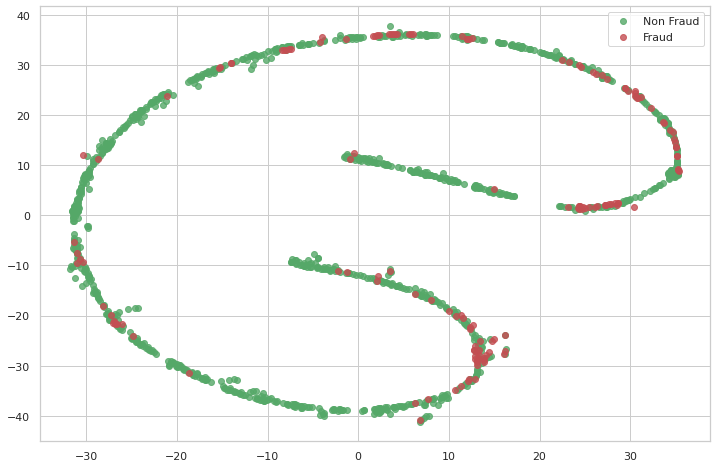

In [15]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

Now we will create a dataset using the latent representations obtained and let's visualize the nature of fraud vs non-fraud cases.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


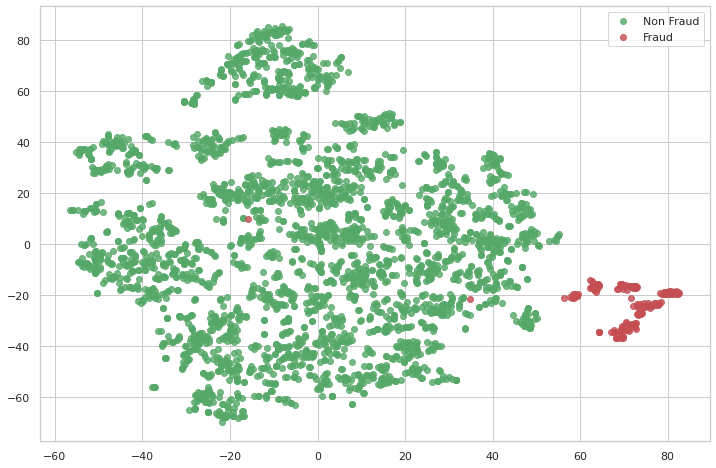

In [16]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")


In [17]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression().fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("confusion_matrixt: ")
print (confusion_matrix(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


confusion_matrixt: 
[[754   0]
 [ 11  22]]

Accuracy Score:  0.9860228716645489


In [18]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x, train_y)
pred_y = svclassifier.predict(val_x)

print ("")
print ("confusion_matrixt: ")
print (confusion_matrix(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


confusion_matrixt: 
[[745   0]
 [  2  40]]

Accuracy Score:  0.9974587039390089
